In this project I will try and make an image compressor using Principal Components Analysis.
I will use packages from Sci_Kit learn, and their 'face' dataset to test out the PCA.

Alot of this data was built using the brilliant course on Datacamp about Dimensionality Reduction


In [52]:
##load relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
##face datasets
from sklearn.datasets import fetch_lfw_people
from PIL import Image

%matplotlib inline


In [9]:
##GET The faces dataset
faces = fetch_lfw_people(min_faces_per_person=50)

In [86]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']


In [89]:
#check shape of data - 1560 rows, with 2914 grayscale pixels
faces.data.shape

(1560, 2914)

In [33]:
data = faces.data

In [42]:
##build a pipleilne for the PCA, first scaling data.

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=0.95))##select the number of components which explain 95% of the variances
])

pipe.fit(data)



Pipeline(steps=[('scaler', StandardScaler()),
                ('reducer', PCA(n_components=0.95))])

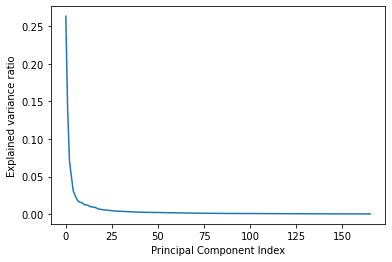

In [43]:
##where is the elbow of the data? 

var = pipe.steps[1][1].explained_variance_ratio_

plt.plot(var)

plt.xlabel('Principal Component Index')
plt.ylabel('Explained variance ratio')
plt.show()

In [60]:
##looks like 25 ish is the elbow, so re run the pipe with 25 components
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=25))##select the number of components which explain 95% of the variances
])

pipe.fit_transform(data)


array([[ 5.34294853e+01,  5.76259279e+00,  1.07925758e+01, ...,
        -4.29824144e-01,  3.09626245e+00, -1.14888215e+00],
       [ 3.51851807e+01, -1.84544277e+01,  3.24884200e+00, ...,
        -6.51546478e+00,  4.79425713e-02,  7.69990087e-01],
       [ 2.18013620e+00, -3.97891312e+01,  1.91330492e+00, ...,
         7.03650999e+00, -3.97938657e+00, -3.55679893e+00],
       ...,
       [-4.26277847e+01, -1.38695116e+01,  1.58034134e+01, ...,
         1.72536075e-01, -2.40209436e+00, -1.59425628e+00],
       [-3.61934853e+01,  3.92574215e+00,  1.37443709e+00, ...,
        -3.48493934e+00, -3.20157075e+00,  3.17858624e+00],
       [ 1.32950211e+01, -4.89961863e+00,  1.16302595e+01, ...,
         2.97976494e+00, -2.15381575e+00,  6.29023933e+00]], dtype=float32)

In [61]:
#columns reduced down to 25
print(transform.shape)

(1560, 25)


In [62]:
rebuilt = pipe.inverse_transform(transform)
print(rebuilt.shape)

(1560, 2914)


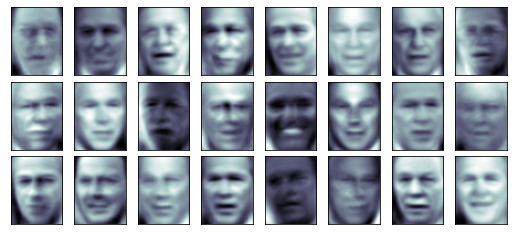

In [63]:
###PCA reduced data with 25 components
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(rebuilt[i].reshape(62, 47), cmap='bone')

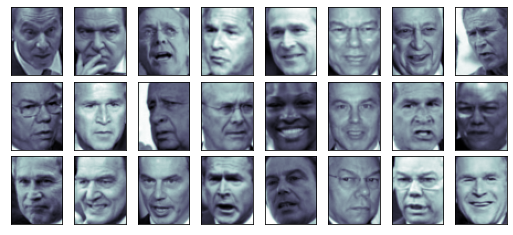

In [64]:
##versus normal
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(62, 47), cmap='bone')

It doesn't look like only 25 components ( a reduction by a couple of orders of magnitude is enough to creat recognisable faces).

We will create a function which allows you to specify the components more easily, so tweaking is easier


In [84]:
##now create a function which does the PCA, with # of components as a variable so we can easily tweak.

def pca_transform_func(components, data):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=components))##select the number of components which explain 95% of the variances
    ])
    ##fit the data 
    fit_data = pipe.fit_transform(data)
    ##transform back to array
    transformed = pipe.inverse_transform(fit_data)
    return transformed

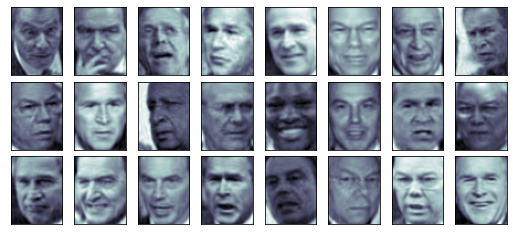

In [99]:
##mess around with the number of components below to try and find the best visual aid which still saves memory
rebuilt_func = pca_transform_func(components=290, data=faces.data)

###PCA reduced data with 25 components
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(rebuilt_func[i].reshape(62, 47), cmap='bone')
